# Fe test

In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import logging
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from ase import Atoms
from ase.io import read
from asap3 import FullNeighborList

from m_ff.configurations import carve_confs

from m_ff.kernels import TwoBodySingleSpeciesKernel, ThreeBodySingleSpeciesKernel
from m_ff.gp import TwoBodySingleSpeciesGP, ThreeBodySingleSpeciesGP
from m_ff.grid import SingleSpeciesGrid

from m_ff.interpolation import Spline3D, Spline1D
from m_ff.calculators import TwoBodySingleSpecies, ThreeBodySingleSpecies, CombinedSingleSpecies

from m_ff.models import TwoBodySingleSpeciesModel, ThreeBodySingleSpeciesModel, CombinedSingleSpeciesModel

logging.basicConfig(level=logging.INFO)

## Parameters

In [4]:
# Parameters
directory = Path('data/Fe_vac/')
r_cut = 4.45
sigma_2b = 0.3
sigma_3b = 0.6
noise = 0.0001

# GP Parameters
ntr = 10
ntest = 10
combine_2b_3b = True

# mapping
grid_start = 1.5
elementslist = [26]
num_2b = 100
num_3b = 10


## Configurations

In [5]:
# # ----------------------------------------
# # Construct a configuration database
# # ----------------------------------------


n_data = 50

filename = directory / 'movie.xyz'

traj = read(filename, index=slice(None), format='extxyz')

elements, confs, forces, energies = carve_confs(
    traj, r_cut, n_data,
    forces_label='force', energy_label='energy')

if not os.path.exists(directory):
    os.makedirs(directory)

np.save('{}/confs_cut={:.2f}.npy'.format(directory, r_cut), confs)
np.save('{}/forces_cut={:.2f}.npy'.format(directory, r_cut), forces)
np.save('{}/energies_cut={:.2f}.npy'.format(directory, r_cut), energies)

lens = [len(conf) for conf in confs]

logging.info('\n'.join((
    'Number of atoms in a configuration:',
    '   maximum: {}'.format(np.max(lens)),
    '   minimum: {}'.format(np.min(lens)),
    '   average: {:.4}'.format(np.mean(lens))
)))

INFO:root:Reading traj step 0
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1
INFO:root:Reading traj step 2
INFO:root:Reading traj step 3
INFO:root:Reading traj step 4
INFO:root:Reading traj step 5
INFO:root:Reading traj step 6
INFO:root:Reading traj step 7
INFO:root:Reading traj step 8
INFO:root:Reading traj step 9
INFO:root:Reading traj step 10
INFO:root:Reading traj step 11
INFO:root:Reading traj step 12
INFO:root:Reading traj step 13
INFO:root:Reading traj step 14
INFO:root:Reading traj step 15
INFO:root:Reading traj step 16
INFO:root:Reading traj step 17
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 18
INFO:root:Reading traj step 19
INFO:root:Reading traj step 20
INFO:root:Reading traj step 21
INFO:root:Reading traj step 22
INFO:root:Reading traj step 23
INFO:root:Reading traj step 24
INFO:root:Reading traj step 25
INFO:root:Reading traj step 26
INFO:root:Reading traj step

INFO:root:Reading traj step 228
INFO:root:Reading traj step 229
INFO:root:Reading traj step 230
INFO:root:Reading traj step 231
INFO:root:Reading traj step 232
INFO:root:Reading traj step 233
INFO:root:Reading traj step 234
INFO:root:Reading traj step 235
INFO:root:Reading traj step 236
INFO:root:Reading traj step 237
INFO:root:Reading traj step 238
INFO:root:Reading traj step 239
INFO:root:Reading traj step 240
INFO:root:Reading traj step 241
INFO:root:Reading traj step 242
INFO:root:Reading traj step 243
INFO:root:Reading traj step 244
INFO:root:Reading traj step 245
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 246
INFO:root:Reading traj step 247
INFO:root:Reading traj step 248
INFO:root:Reading traj step 249
INFO:root:Reading traj step 250
INFO:root:Reading traj step 251
INFO:root:Reading traj step 252
INFO:root:Reading traj step 253
INFO:root:Reading traj step 254
INFO:root:Reading traj step 255
INFO:root:Reading traj step 256

INFO:root:Reading traj step 456
INFO:root:Reading traj step 457
INFO:root:Reading traj step 458
INFO:root:Reading traj step 459
INFO:root:Reading traj step 460
INFO:root:Reading traj step 461
INFO:root:Reading traj step 462
INFO:root:Reading traj step 463
INFO:root:Reading traj step 464
INFO:root:Reading traj step 465
INFO:root:Reading traj step 466
INFO:root:Reading traj step 467
INFO:root:Reading traj step 468
INFO:root:Reading traj step 469
INFO:root:Reading traj step 470
INFO:root:Reading traj step 471
INFO:root:Reading traj step 472
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 473
INFO:root:Reading traj step 474
INFO:root:Reading traj step 475
INFO:root:Reading traj step 476
INFO:root:Reading traj step 477
INFO:root:Reading traj step 478
INFO:root:Reading traj step 479
INFO:root:Reading traj step 480
INFO:root:Reading traj step 481
INFO:root:Reading traj step 482
INFO:root:Reading traj step 483
INFO:root:Reading traj step 484

INFO:root:Reading traj step 683
INFO:root:Reading traj step 684
INFO:root:Reading traj step 685
INFO:root:Reading traj step 686
INFO:root:Reading traj step 687
INFO:root:Reading traj step 688
INFO:root:Reading traj step 689
INFO:root:Reading traj step 690
INFO:root:Reading traj step 691
INFO:root:Reading traj step 692
INFO:root:Reading traj step 693
INFO:root:Reading traj step 694
INFO:root:Reading traj step 695
INFO:root:Reading traj step 696
INFO:root:Reading traj step 697
INFO:root:Reading traj step 698
INFO:root:Reading traj step 699
INFO:root:Reading traj step 700
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 701
INFO:root:Reading traj step 702
INFO:root:Reading traj step 703
INFO:root:Reading traj step 704
INFO:root:Reading traj step 705
INFO:root:Reading traj step 706
INFO:root:Reading traj step 707
INFO:root:Reading traj step 708
INFO:root:Reading traj step 709
INFO:root:Reading traj step 710
INFO:root:Reading traj step 711

## GP

In [6]:
# ----------------------------------------
# Test a simple GP on the built database
# ----------------------------------------


# Get configurations and forces from file
confs = np.load(directory / 'confs_cut={:.2f}.npy'.format(r_cut))
forces = np.load(directory / 'forces_cut={:.2f}.npy'.format(r_cut))
numconfs = len(forces)
ind = np.arange(numconfs)
ind_tot = np.random.choice(ind, size=ntr + ntest, replace=False)

# Separate into random testing and training dataset
# tr_confs, tr_forces = confs[ind[:ntr]], forces[ind[:ntr]]
# tst_confs, tst_forces = confs[ind[ntr:]], forces[ind[ntr:]]

# Use fixed training and testing dataset
tr_confs, tr_forces = confs[:ntr], forces[:ntr]
tst_confs, tst_forces = confs[-ntest - 1:-1], forces[-ntest - 1:-1]

In [7]:
model = CombinedSingleSpeciesModel(elementslist[0], r_cut, sigma_2b, sigma_3b, r_cut / 10.0, r_cut / 10.0, noise)
model.fit(tr_confs, tr_forces)

INFO:m_ff.kernels.twobody:Started compilation of theano two body single species kernels
INFO:m_ff.kernels.twobody:Ended compilation of theano two body single species kernels
INFO:m_ff.kernels.threebodykernel:Started compilation of theano three body single species kernels
INFO:m_ff.kernels.threebodykernel:Ended compilation of theano three body single species kernels


In [8]:
# Test the GP performance
print('Testing GP')

gp_forces = np.zeros((ntest, 3))
gp_error = np.zeros((ntest, 3))

for i in np.arange(ntest):
    gp_forces[i, :] = model.predict(np.reshape(tst_confs[i], (1, len(tst_confs[i]), 5)))
    gp_error[i, :] = gp_forces[i, :] - tst_forces[i, :]

MAEF = np.mean(np.sqrt(np.sum(np.square(gp_error), axis=1)))
SMAEF = np.std(np.sqrt(np.sum(np.square(gp_error), axis=1)))

MF = np.mean(np.linalg.norm(tst_forces, axis=1))

print('MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF, SMAEF))
print('Relative MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF / MF, SMAEF / MF))

Testing GP
MAEF on forces: 0.3733 +- 0.1074
Relative MAEF on forces: 0.5052 +- 0.1454


## Mapping

In [9]:

grid_2b, grid_3b = model.build_grid(grid_start, num_2b, 30)


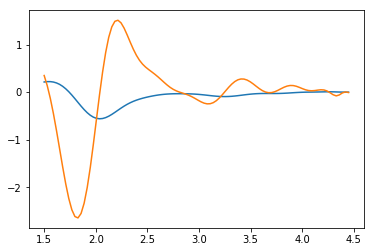

In [10]:
dists_2b = np.linspace(grid_start, r_cut, num_2b)
plt.plot(dists_2b, grid_2b(dists_2b, nu=0))
plt.plot(dists_2b, grid_2b(dists_2b, nu=1))

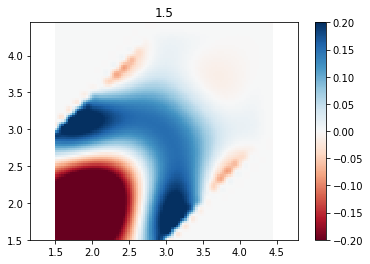

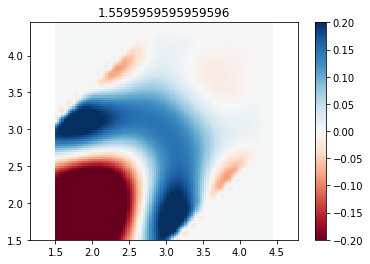

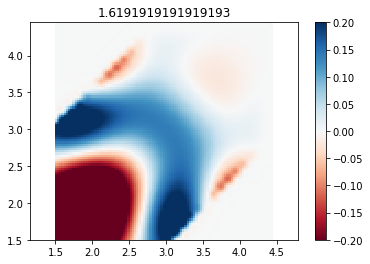

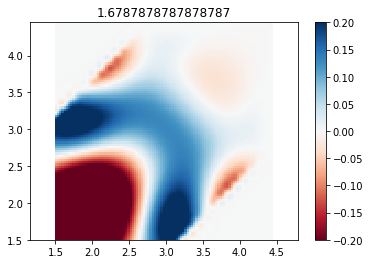

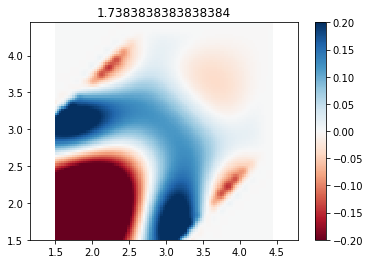

In [11]:
dists_3b = np.linspace(grid_start, r_cut, 100)

z_min, z_max = -0.2, 0.2
for i in range(0, num_3b, 2):
    plt.title(dists_3b[i])
    
    dists_k = np.ones_like(dists_3b) * dists_3b[i]
    X, Y = np.meshgrid(dists_3b, dists_3b)

    g_data = grid_3b(X.flatten(), Y.flatten(), np.ones_like(X.flatten()) * dists_3b[i]).reshape(100, 100)

    plt.pcolor(dists_3b, dists_3b, -g_data, cmap='RdBu', vmin=z_min, vmax=z_max)
#     plt.pcolor(dists_3b, dists_3b, -g_data[:,:,i], cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.colorbar()
    plt.axis('equal')

    plt.show()

## ASE Calculator

In [12]:

def rmse(x1, x2):
    rms = np.sqrt(np.sum(np.square(x1 - x2), axis=1))
    return np.mean(rms), np.std(rms)
    

In [13]:
# grid_2b = TwoBodySingleSpeciesGrid.from_file(str(directory / 'MFF_2b_ntr_20_sig_0.30_cut_4.45.npy'))
# grid_3b = ThreeBodySingleSpeciesGrid.from_file(str(directory / 'MFF_3b_ntr_20_sig_0.60_cut_4.45.npy'))

# calc = ThreeBodySingleSpecies(r_cut=4.45, grid_2b=grid_2b, grid_3b=grid_3b)


# filename = directory / 'movie.xyz'
# traj = read(str(filename), index=slice(0,5))
# for atoms in traj[0:5]:

#     atoms.set_calculator(calc)

#     rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
#     print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))



In [14]:
calc = TwoBodySingleSpecies(r_cut, grid_2b)

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 5))

for atoms in traj:

    atoms.set_calculator(calc)

    rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))
    
f2 = atoms.get_forces()

INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize


MAEF on forces: 0.1924 +- 0.0815
MAEF on forces: 0.1930 +- 0.0786
MAEF on forces: 0.1936 +- 0.0772
MAEF on forces: 0.1933 +- 0.0790
MAEF on forces: 0.1916 +- 0.0813


In [15]:
calc = CombinedSingleSpecies(r_cut, grid_2b, grid_3b)

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 5))

for atoms in traj:

    atoms.set_calculator(calc)

    rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))

f23 = atoms.get_forces()

INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize


MAEF on forces: 0.4969 +- 0.2414
MAEF on forces: 0.4953 +- 0.2357
MAEF on forces: 0.4946 +- 0.2318
MAEF on forces: 0.4951 +- 0.2302
MAEF on forces: 0.4965 +- 0.2306
